In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/sharooqfarzeenak/cardekho-cleaned
df=pd.read_csv("cardekho.csv")

In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [7]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
df["seats"].value_counts()

seats
5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: count, dtype: int64

In [9]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [10]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti Wagon R,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai i20,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [11]:
df.drop_duplicates(keep="first", ignore_index=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15244 entries, 0 to 15243
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15244 non-null  object 
 1   brand              15244 non-null  object 
 2   model              15244 non-null  object 
 3   vehicle_age        15244 non-null  int64  
 4   km_driven          15244 non-null  int64  
 5   seller_type        15244 non-null  object 
 6   fuel_type          15244 non-null  object 
 7   transmission_type  15244 non-null  object 
 8   mileage            15244 non-null  float64
 9   engine             15244 non-null  int64  
 10  max_power          15244 non-null  float64
 11  seats              15244 non-null  int64  
 12  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [13]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [14]:
df["seats"].value_counts()

seats
5    12767
7     1902
8      310
6      125
4       76
9       55
2        7
0        2
Name: count, dtype: int64

In [15]:
df[df["seats"]==0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3207,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12504,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [16]:
df.loc[df["seats"]==0, "seats"]=5

In [17]:
df[df["seats"]==0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [18]:
df["seats"].value_counts()

seats
5    12769
7     1902
8      310
6      125
4       76
9       55
2        7
Name: count, dtype: int64

In [19]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326817,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.806464,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [20]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [21]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.0000,15244.0000,15244.0000,15244.0000,15244.0000,15244.0000,15244.0000
mean,6.0411,55639.5823,19.6973,1486.1715,100.6077,5.3268,774701.4481
std,3.0162,51766.2993,4.1693,520.4194,42.9157,0.8065,894676.0819
min,0.0000,100.0000,4.0000,793.0000,38.4000,2.0000,40000.0000
25%,4.0000,30000.0000,17.0000,1197.0000,74.0000,5.0000,385000.0000
50%,6.0000,50000.0000,19.6700,1248.0000,88.5000,5.0000,559000.0000
75%,8.0000,70000.0000,22.7000,1582.0000,117.3000,5.0000,825000.0000
max,29.0000,3800000.0000,33.5400,6592.0000,626.0000,9.0000,39500000.0000


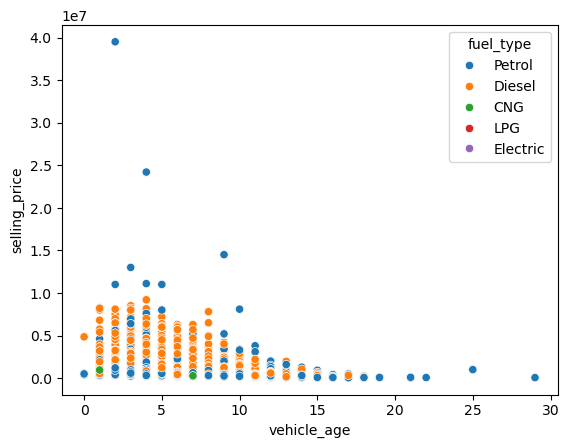

In [22]:
sns.scatterplot(x=df['vehicle_age'], y=df['selling_price'], hue=df['fuel_type'])
plt.show()

In [23]:
df['selling_price'].max()

39500000

In [24]:
df = df[(df['selling_price'] < 15000000)]

In [25]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15242.0000,15242.0000,15242.0000,15242.0000,15242.0000,15242.0000,15242.0000
mean,6.0415,55646.3058,19.6990,1485.6811,100.5445,5.3270,770623.8601
std,3.0162,51766.3672,4.1669,518.4525,42.5621,0.8064,816170.0239
min,0.0000,100.0000,6.0000,793.0000,38.4000,2.0000,40000.0000
25%,4.0000,30000.0000,17.0000,1197.0000,74.0000,5.0000,385000.0000
50%,6.0000,50000.0000,19.6700,1248.0000,88.5000,5.0000,559000.0000
75%,8.0000,70000.0000,22.7000,1582.0000,117.3000,5.0000,825000.0000
max,29.0000,3800000.0000,33.5400,5998.0000,626.0000,9.0000,14500000.0000


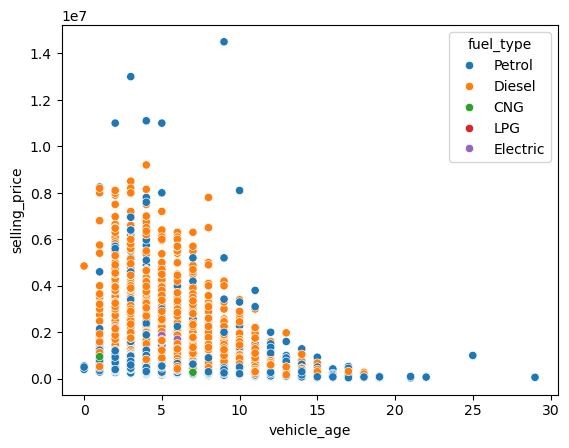

In [26]:
sns.scatterplot(x=df['vehicle_age'], y=df['selling_price'], hue=df['fuel_type'])
plt.show()

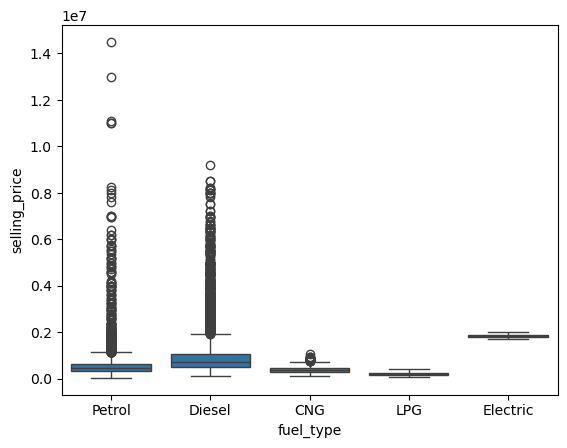

In [27]:
sns.boxplot(data=df, x="fuel_type", y="selling_price")
plt.show()

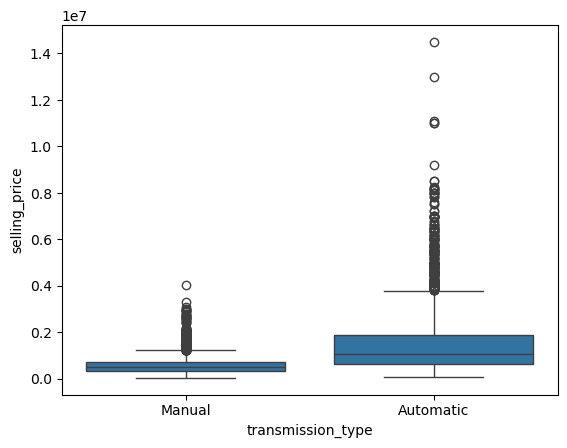

In [28]:
sns.boxplot(data=df, x="transmission_type", y="selling_price")
plt.show()

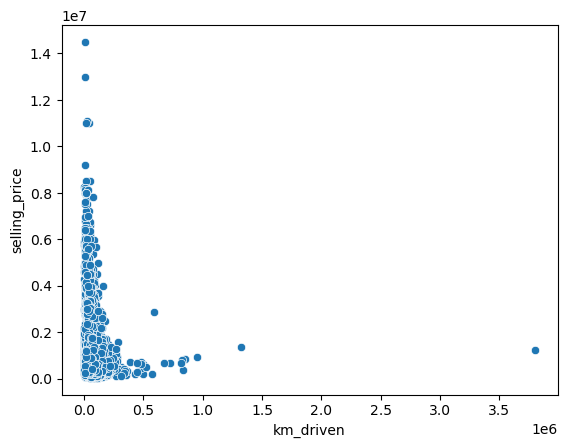

In [29]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.show()

In [30]:
df['km_driven'].max()

3800000

In [31]:
df = df[(df['km_driven'] < 1000000)]

In [32]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15240.0000,15240.0000,15240.0000,15240.0000,15240.0000,15240.0000,15240.0000
mean,6.0414,55317.3224,19.6998,1485.5371,100.5347,5.3269,770556.0285
std,3.0163,40672.4436,4.1666,518.3134,42.5545,0.8063,816201.7843
min,0.0000,100.0000,6.0000,793.0000,38.4000,2.0000,40000.0000
25%,4.0000,30000.0000,17.0000,1197.0000,74.0000,5.0000,385000.0000
50%,6.0000,50000.0000,19.6700,1248.0000,88.5000,5.0000,558500.0000
75%,8.0000,70000.0000,22.7000,1582.0000,117.3000,5.0000,825000.0000
max,29.0000,950000.0000,33.5400,5998.0000,626.0000,9.0000,14500000.0000


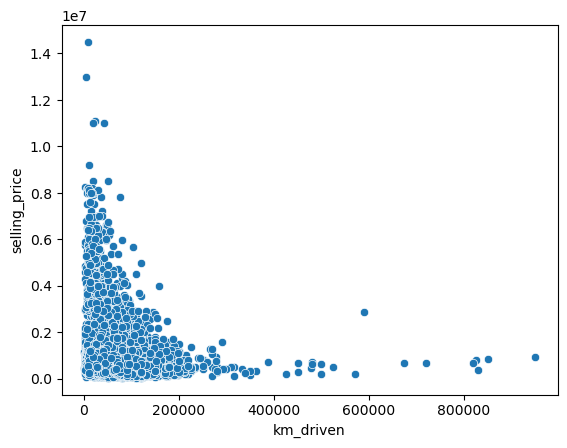

In [33]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.show()

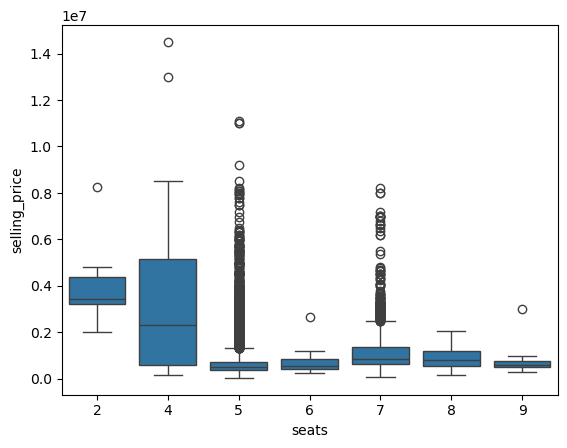

In [34]:
sns.boxplot(data=df, x="seats", y="selling_price")
plt.show()

In [35]:
df.corr(numeric_only=True)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.0000,0.4235,-0.2582,0.0998,0.0058,0.0313,-0.2591
km_driven,0.4235,1.0000,-0.1248,0.2335,0.0485,0.2326,-0.1095
mileage,-0.2582,-0.1248,1.0000,-0.6323,-0.5323,-0.4430,-0.3186
engine,0.0998,0.2335,-0.6323,1.0000,0.8065,0.5569,0.6118
max_power,0.0058,0.0485,-0.5323,0.8065,1.0000,0.1768,0.7732
seats,0.0313,0.2326,-0.4430,0.5569,0.1768,1.0000,0.1348
selling_price,-0.2591,-0.1095,-0.3186,0.6118,0.7732,0.1348,1.0000


In [36]:
X=df.drop("selling_price", axis=1)
y=df["selling_price"]

In [37]:
X.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7000,796,46.3000,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9000,1197,82.0000,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0000,1197,80.0000,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.9200,998,67.1000,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.7700,1498,98.5900,5


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [39]:
cat_cols = df.select_dtypes("object").columns.to_list()

In [40]:
cat_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [41]:
unique_values = df[cat_cols].nunique()

In [42]:
unique_values

car_name             119
brand                 30
model                118
seller_type            3
fuel_type              5
transmission_type      2
dtype: int64

In [43]:
# seller_type, fuel_type, transmission_type low number of unique values ->  OneHotEncoder
# car_name, brand and model have higher number of unique values -> OrdinalEncoder might work, because it is 
# essentially a tree algorithm. but it does not make sense because car name, brand and model do not have
# logical ordering such as highschool, undergrad, grad etc. so best fit might be frequency encoding

In [44]:
onehot_columns = ['seller_type', 'fuel_type', 'transmission_type']
freq_columns = ['car_name', 'brand', 'model']

In [45]:
for col in freq_columns:
    # calculate frequencies in training
    freq = X_train[col].value_counts() / len(X_train)

    X_train[col + '_freq'] = X_train[col].map(freq)

    X_test[col + '_freq'] = X_test[col].map(freq)
    
    # if there is a different category that is left nan in xtest just fill it with mean
    mean_freq = freq.mean()
    X_test[col + '_freq'] = X_test[col + '_freq'].fillna(mean_freq)

In [46]:
X_train.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
6205,Mahindra XUV500,Mahindra,XUV500,2,18000,Individual,Diesel,Manual,15.1000,2179,152.8700,7,0.0221,0.0668,0.0221
7707,Tata Nexon,Tata,Nexon,4,25000,Individual,Petrol,Manual,17.0000,1198,108.5000,5,0.0053,0.0277,0.0053
5332,Mahindra XUV500,Mahindra,XUV500,4,58500,Dealer,Diesel,Manual,16.0000,2179,140.0000,7,0.0221,0.0668,0.0221
2935,Maruti Eeco,Maruti,Eeco,6,59000,Dealer,Petrol,Manual,15.1000,1196,73.0000,7,0.0076,0.3212,0.0076
6419,Maruti Baleno,Maruti,Baleno,4,32000,Dealer,Petrol,Manual,21.0100,1197,81.8000,5,0.0241,0.3212,0.0241


In [47]:
X_test.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
10573,Hyundai i10,Hyundai,i10,7,90000,Dealer,Petrol,Manual,19.8100,1086,68.0500,5,0.0264,0.1962,0.0264
4407,Ford Ecosport,Ford,Ecosport,4,45000,Individual,Diesel,Manual,23.0000,1498,98.9600,5,0.0255,0.0507,0.0255
5654,Maruti Baleno,Maruti,Baleno,4,71000,Dealer,Diesel,Manual,27.3900,1248,74.0000,5,0.0241,0.3212,0.0241
13787,Volkswagen Vento,Volkswagen,Vento,4,37959,Dealer,Petrol,Automatic,18.1900,1197,103.2000,5,0.0159,0.0404,0.0159
1156,Maruti Ciaz,Maruti,Ciaz,2,15260,Dealer,Diesel,Manual,28.0900,1248,88.5000,5,0.0224,0.3212,0.0224


In [48]:
X_train = X_train.drop(["car_name", "brand", "model"], axis = 1)
X_test = X_test.drop(["car_name", "brand", "model"], axis = 1)

In [49]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [103]:
transformer = ColumnTransformer(
        transformers= [
            ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"),onehot_columns)
        ], remainder = "passthrough"
)

In [105]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [109]:
encoded_cols = transformer.get_feature_names_out()
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats', 'remainder__car_name_freq',
       'remainder__brand_freq', 'remainder__model_freq'], dtype=object)

In [111]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [113]:
X_train.head()

,onehot__seller_type_Individual,onehot__seller_type_Trustmark Dealer,onehot__fuel_type_Diesel,onehot__fuel_type_Electric,onehot__fuel_type_LPG,onehot__fuel_type_Petrol,onehot__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats,remainder__car_name_freq,remainder__brand_freq,remainder__model_freq
0,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.0000,18000.0000,15.1000,2179.0000,152.8700,7.0000,0.0221,0.0668,0.0221
1,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,4.0000,25000.0000,17.0000,1198.0000,108.5000,5.0000,0.0053,0.0277,0.0053
2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,4.0000,58500.0000,16.0000,2179.0000,140.0000,7.0000,0.0221,0.0668,0.0221
3,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,6.0000,59000.0000,15.1000,1196.0000,73.0000,7.0000,0.0076,0.3212,0.0076
4,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,4.0000,32000.0000,21.0100,1197.0000,81.8000,5.0000,0.0241,0.3212,0.0241


In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   onehot__seller_type_Individual        10668 non-null  float64
 1   onehot__seller_type_Trustmark Dealer  10668 non-null  float64
 2   onehot__fuel_type_Diesel              10668 non-null  float64
 3   onehot__fuel_type_Electric            10668 non-null  float64
 4   onehot__fuel_type_LPG                 10668 non-null  float64
 5   onehot__fuel_type_Petrol              10668 non-null  float64
 6   onehot__transmission_type_Manual      10668 non-null  float64
 7   remainder__vehicle_age                10668 non-null  float64
 8   remainder__km_driven                  10668 non-null  float64
 9   remainder__mileage                    10668 non-null  float64
 10  remainder__engine                     10668 non-null  float64
 11  remainder__max_

In [117]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [119]:
# you can initialize this with decision tree regressor or not. if you do not specify it will be initialized with
#decision tree regressor with max depth of 3
#model = AdaBoostRegressor(DecisionTreeRegressor())
model = AdaBoostRegressor()

In [121]:
model.fit(X_train, y_train)

AdaBoostRegressor()

In [123]:
y_pred = model.predict(X_test)

In [125]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.40847754364115485
mean squared error:  273920417935.6028
mean absolute error:  451452.86565296666


In [127]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

In [129]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(), param_distributions=params, scoring='r2', cv=5)

In [131]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [132]:
rcv.best_params_

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.1}

In [135]:
y_pred = rcv.predict(X_test)

In [137]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.7468967129741684
mean squared error:  132711484464.7652
mean absolute error:  227363.43807955418


In [139]:
# if you want, you can tune the depth as well with manually initializing the tree

In [141]:
params = {
    "estimator__max_depth" : [3,4,5],
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

In [143]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(DecisionTreeRegressor()), param_distributions=params, scoring='r2', cv=5)

In [145]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   param_distributions={'estimator__max_depth': [3, 4, 5],
                                        'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [146]:
rcv.best_params_

{'n_estimators': 80,
 'loss': 'exponential',
 'learning_rate': 0.1,
 'estimator__max_depth': 5}

In [147]:
y_pred = rcv.predict(X_test)
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.8781315201290621
mean squared error:  69453079845.66293
mean absolute error:  147063.637604891
